We are setting up a Google Colab environment for data extraction and manipulation. Firstly, the Google Drive library is imported to access files stored on Google Drive. The `os`, `pandas`, `numpy`, and `zipfile` libraries are also imported for directory manipulation, data processing, numerical operations, and handling ZIP files, respectively.

The `drive_path` variable is defined to point to the 'MyDrive' directory on Google Drive, where the user's files are stored.

The `extract_zip` function is defined to extract ZIP files. It takes in two parameters: `zip_path` (the path to the ZIP file) and `extract_to` (the directory where the contents of the ZIP file will be extracted). By default, `extract_to` is set to the current directory ('.'). Inside this function, the `ZipFile` class from the `zipfile` module is used to read and extract the contents of the specified ZIP file.

`zip_file_path` is a variable that combines the `drive_path` with the specific name of the ZIP file ('fer_data.zip'), resulting in a full path to the ZIP file on Google Drive.

Finally, the `extract_zip` function is called with `zip_file_path` and the extraction directory ('/content') as arguments. This will extract the contents of 'fer_data.zip' into the '/content' directory in the Colab environment.


In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import zipfile

drive_path = '/content/drive/MyDrive/'

def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file_path = os.path.join(drive_path, 'fer_data.zip')

extract_zip(zip_file_path, '/content')




Next we are preparing data generators for training, validation, and testing datasets using the Keras library in TensorFlow, specifically for image data.

1. **Import Statement**: The `ImageDataGenerator` class from `tensorflow.keras.preprocessing.image` is imported. This class allows for easy and efficient data augmentation and preprocessing.

2. **Batch Size Definition**: The `batch_size` variable is set to 64. This defines how many samples will be passed through the network at one time.

3. **Function Definition - `get_datagen`**:
    - The function `get_datagen` is defined to create data generators with optional augmentation.
    - It accepts two parameters: `dataset` (the path to the dataset) and `aug` (a boolean indicating whether data augmentation should be applied).
    - If `aug` is `True`, the `ImageDataGenerator` is initialized with various augmentation parameters like `rotation_range`, `width_shift_range`, `height_shift_range`, `zoom_range`, and `horizontal_flip`. This helps in creating a more robust model by providing varied forms of input data.
    - If `aug` is `False`, a basic `ImageDataGenerator` with only `rescale` is created for normalization.
    - The function then uses `flow_from_directory` to load images from the given directory (`dataset`), applying the defined transformations. The images are resized to 197x197 pixels, and the color mode is set to 'rgb'.




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64

def get_datagen(dataset, aug=False):
    if aug:
        datagen = ImageDataGenerator(
                            rescale=1./255,
                            featurewise_center=False,
                            featurewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    return datagen.flow_from_directory(
            dataset,
            target_size=(197, 197),
            color_mode='rgb',
            shuffle = True,
            class_mode='categorical',
            batch_size=batch_size)

4. **Creating Data Generators**:
    - Data generators for training (`train_generator`), validation (`validation_generator`), and test (`test_generator`) datasets are created by calling the `get_datagen` function with appropriate paths and augmentation settings.
    - For the training data, augmentation is enabled (`True`), while for validation and test data, it's disabled.

5. **Output Messages**:
    - The output messages indicate that the images have been successfully found and loaded into the respective generators.
    - It shows the number of images and the number of classes found in each dataset: 28709 images in 7 classes for training, 3589 images in 7 classes for validation, and 3589 images in 7 classes for testing.

In [ ]:
train_generator = get_datagen('/content/fer_data/train', True)
validation_generator = get_datagen('/content/fer_data/validation')
test_generator = get_datagen('/content/fer_data/test')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
!pip install git+https://github.com/yaledhlab/vggface.git

  Cloning https://github.com/yaledhlab/vggface.git to /tmp/pip-req-build-zplnea4y
  Running command git clone --filter=blob:none --quiet https://github.com/yaledhlab/vggface.git /tmp/pip-req-build-zplnea4y
  Resolved https://github.com/yaledhlab/vggface.git to commit b76539b7588bca69b0030ad7e4f985f877dc7c0a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8332 sha256=0fb45da3546e60fb626c6f4d8af9a02e1373a2bd519b28c872d096ed70500eb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-g7ogndkh/wheels/79/35/65/07a23ffb182ac2ec3a43776e08b2cf52daf0ce54da686eefbe
Successfully built keras-vggface


In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
from keras_vggface.vggface import VGGFace

Creating function to plot the model accuracy and loss curves

In [ ]:

def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1, step=len(model_history.history['accuracy'])//10))
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1, step=len(model_history.history['loss'])//10))
    axs[1].legend(['train', 'val'], loc='best')

    fig.savefig('plot.png')
    plt.show()


ResNet50 Model

Now we move on to the ResNet50 Pretrained model, we are constructing and configuring a deep learning model for facial emotion recognition using the TensorFlow and Keras libraries.

1. **Import Statements**: Essential Keras components are imported, including layers (`Flatten`, `Dense`, `Dropout`), model (`Model`), optimizers (`Adam`, `SGD`), and callbacks (`ReduceLROnPlateau`).

2. **Constants and Parameters**: Constants such as batch size (`BS`), dropout rate (`DROPOUT_RATE`), and SGD parameters (`SGD_LEARNING_RATE`, `SGD_DECAY`) are defined.

3. **Base Model (VGGFace with ResNet-50)**: A pre-trained VGGFace model using the ResNet-50 architecture is loaded without its top layers (`include_top=False`). This model is used as the base for feature extraction.

4. **Adding Custom Layers**: New layers are added for flattening, dropout, and dense layers for classification. The dropout layers help prevent overfitting.

5. **Freezing Layers**: A significant number of layers in the base model are frozen (made non-trainable), except for batch normalization layers, to maintain pre-trained features.

6. **Final Output Layer**: A Dense layer with softmax activation for 7 classes is added as the final output layer, indicating the model's goal to classify into 7 emotions.

7. **Model Assembly**: The custom layers are appended to the base model to create the final model architecture.

8. **Compiling the Model**: The model is compiled with the SGD optimizer, categorical crossentropy loss function, and accuracy as the metric.




In [ ]:
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau

# Constants
BS = 128
DROPOUT_RATE = 0.5
FROZEN_LAYER_NUM = 170
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001

Resize_pixelsize = 197

# VGGFace model with ResNet-50 architecture
vgg_notop = VGGFace(model='resnet50', include_top=False, input_shape=(Resize_pixelsize, Resize_pixelsize, 3), pooling='avg')

# Modifying layers
last_layer = vgg_notop.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dropout(DROPOUT_RATE, name='dropout_fc6')(x)
x = Dense(4096, activation='relu', name='fc6')(x)
x = Dropout(DROPOUT_RATE, name='dropout_fc7')(x)
x = Dense(1024, activation='relu', name='fc7')(x)
x = Dropout(DROPOUT_RATE, name='dropout_fc8')(x)

# Freezing layers
batch_norm_indices = [2, 6, 9, 13, 14, 18, 21, 24, 28, 31, 34, 38, 41, 45, 46, 53, 56, 60, 63, 66, 70, 73, 76, 80, 83, 87, 88, 92, 95, 98, 102, 105, 108, 112, 115, 118, 122, 125, 128, 132, 135, 138, 142, 145, 149, 150, 154, 157, 160, 164, 167, 170]
for i in range(FROZEN_LAYER_NUM):
    if i not in batch_norm_indices:
        vgg_notop.layers[i].trainable = False

# Adding the final classifier layer
out = Dense(7, activation='softmax', name='classifier')(x)

# Creating the final model
model = Model(inputs=vgg_notop.input, outputs=out)

# Optimizers and callbacks
optim = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
sgd_optim = SGD(learning_rate=SGD_LEARNING_RATE, momentum=0.9, nesterov=True)
rlrop = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.5, patience=10, min_lr=0.00001, verbose=1)

# Compiling the model
model.compile(optimizer=sgd_optim, loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 197, 197, 3)]        0         []                            
                                                                                                  
 conv1/7x7_s2 (Conv2D)       (None, 99, 99, 64)           9408      ['input_2[0][0]']             
                                                                                                  
 conv1/7x7_s2/bn (BatchNorm  (None, 99, 99, 64)           256       ['conv1/7x7_s2[0][0]']        
 alization)                                                                                       
                                                                                                  
 activation_49 (Activation)  (None, 99, 99, 64)           0         ['conv1/7x7_s2/bn[0][0]'

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=28709// BS,
    validation_steps=3589 // BS,
    shuffle=True,
    epochs=100,
    callbacks=[rlrop],
    verbose=1
)

model.save('pretrained_Resnet.h5')

Epoch 1/100
224/224 [==============================] - 142s 545ms/step - loss: 1.9992 - accuracy: 0.3018 - val_loss: 1.8656 - val_accuracy: 0.1708 - lr: 0.0100
Epoch 2/100
224/224 [==============================] - 121s 540ms/step - loss: 1.5023 - accuracy: 0.4265 - val_loss: 1.9402 - val_accuracy: 0.1713 - lr: 0.0100
Epoch 3/100
224/224 [==============================] - 123s 550ms/step - loss: 1.3754 - accuracy: 0.4816 - val_loss: 1.5338 - val_accuracy: 0.4040 - lr: 0.0100
Epoch 4/100
224/224 [==============================] - 123s 547ms/step - loss: 1.3168 - accuracy: 0.5130 - val_loss: 1.1577 - val_accuracy: 0.5664 - lr: 0.0100
Epoch 5/100
224/224 [==============================] - 126s 563ms/step - loss: 1.2489 - accuracy: 0.5382 - val_loss: 1.0851 - val_accuracy: 0.5988 - lr: 0.0100
Epoch 6/100
224/224 [==============================] - 123s 550ms/step - loss: 1.2217 - accuracy: 0.5436 - val_loss: 1.0935 - val_accuracy: 0.6071 - lr: 0.0100
Epoch 7/100
224/224 [===================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print("val accuracy:", val_accuracy)
print("val loss:", val_loss)

57/57 [==============================] - 4s 72ms/step - loss: 0.8081 - accuracy: 0.7122
val accuracy: 0.7121760845184326
val loss: 0.8081436157226562


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

57/57 [==============================] - 4s 75ms/step - loss: 0.8455 - accuracy: 0.7094
Test accuracy: 0.7093898057937622
Test loss: 0.845494270324707


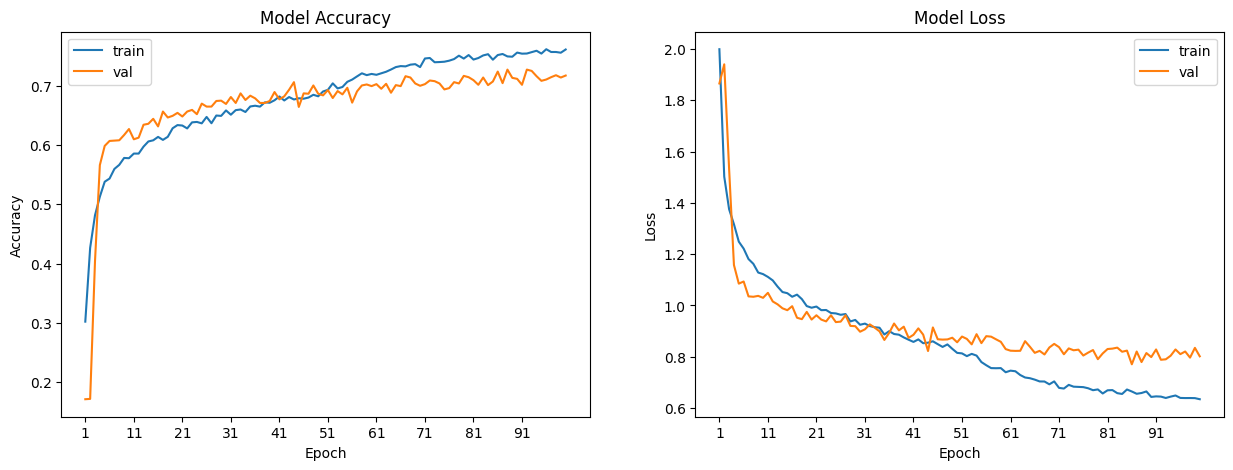

In [ ]:
import matplotlib.pyplot as plt
plot_model_history(history)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the batch size
batch_size = 64


# Configuration for test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    '/content/fer_data/test',  # Replace with your actual path to the test data
    target_size=(197, 197),
    batch_size=1,
    color_mode="rgb",  # If using the ResNet adaptation, this should be "rgb"
    class_mode='categorical',
    shuffle=False  # Important for test data to not shuffle
)

3589/3589 [==============================] - 25s 7ms/step


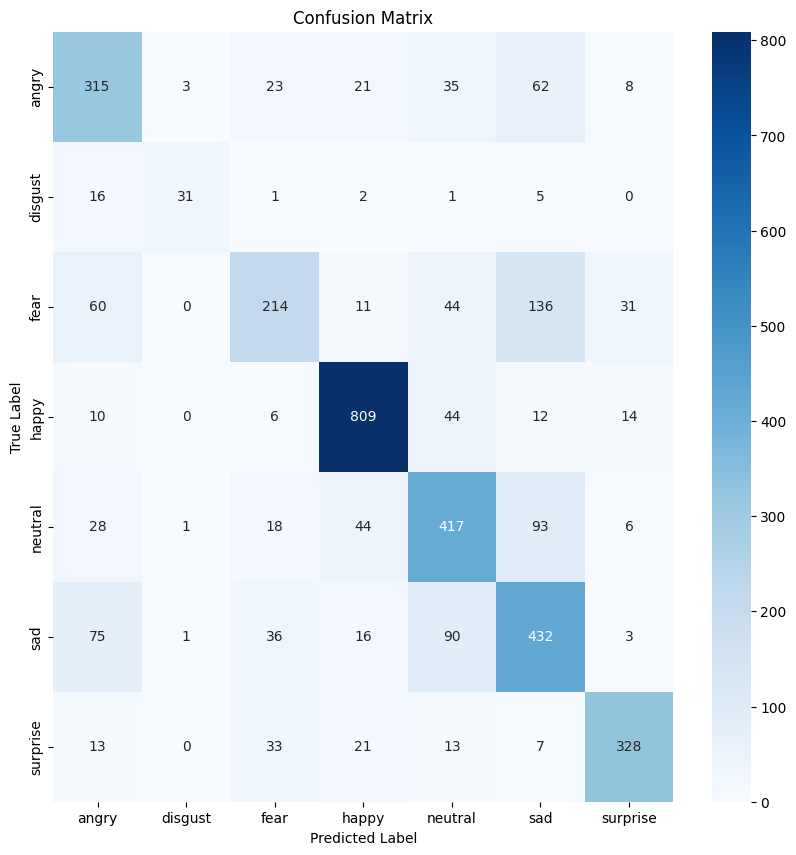

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Reset the test generator
test_generator.reset()

# Get predictions
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels,
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### VGG arch model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau

def create_vgg_model_2(input_shape=(48, 48, 1), num_classes=7, drop=0.2, l2_reg=0.01):
    model = Sequential()

    # Convolutional Stage 1
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Stage 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Stage 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Stage 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dropout(drop))
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(drop))
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(l2_reg)))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(l2_reg)))

    return model

# Creating the model with L2 regularization
model = create_vgg_model_2()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the batch size
batch_size = 128


# Augmentation configuration we use for training with a validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest' # Use 10% of the images as validation data
)

# Training data generator (specifying 'subset' as 'training')
train_generator = train_datagen.flow_from_directory(
    '/content/fer_data/train',  # Replace with your training data directory
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",  # If using the ResNet adaptation, this should be "rgb"
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Configuration for test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Validation data generator (specifying 'subset' as 'validation')
validation_generator = train_datagen.flow_from_directory(
    '/content/fer_data/validation',  # Replace with your training data directory
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",  # If using the ResNet adaptation, this should be "rgb"
    class_mode='categorical' # Set as validation data
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    '/content/fer_data/test',  # Replace with your actual path to the test data
    target_size=(48, 48),
    batch_size=1,
    color_mode="grayscale",  # If using the ResNet adaptation, this should be "rgb"
    class_mode='categorical',
    shuffle=False  # Important for test data to not shuffle
)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,
    verbose=1
)

Epoch 1/100
224/224 [==============================] - 43s 121ms/step - loss: 20.1764 - accuracy: 0.2411 - val_loss: 3.8250 - val_accuracy: 0.1663
Epoch 2/100
224/224 [==============================] - 26s 115ms/step - loss: 2.6360 - accuracy: 0.2720 - val_loss: 2.2034 - val_accuracy: 0.1975
Epoch 3/100
224/224 [==============================] - 26s 115ms/step - loss: 1.8820 - accuracy: 0.3341 - val_loss: 1.8192 - val_accuracy: 0.3580
Epoch 4/100
224/224 [==============================] - 26s 115ms/step - loss: 1.6441 - accuracy: 0.4077 - val_loss: 1.7942 - val_accuracy: 0.3306
Epoch 5/100
224/224 [==============================] - 26s 115ms/step - loss: 1.5169 - accuracy: 0.4543 - val_loss: 1.6224 - val_accuracy: 0.3890
Epoch 6/100
224/224 [==============================] - 26s 115ms/step - loss: 1.4193 - accuracy: 0.4870 - val_loss: 1.4343 - val_accuracy: 0.4824
Epoch 7/100
224/224 [==============================] - 26s 114ms/step - loss: 1.3563 - accuracy: 0.5201 - val_loss: 1.4573 

In [ ]:
model.save('vgg16_updated.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

3589/3589 [==============================] - 14s 4ms/step - loss: 1.3561 - accuracy: 0.6668
Test accuracy: 0.6667595505714417
Test loss: 1.3561335802078247


3589/3589 [==============================] - 10s 3ms/step


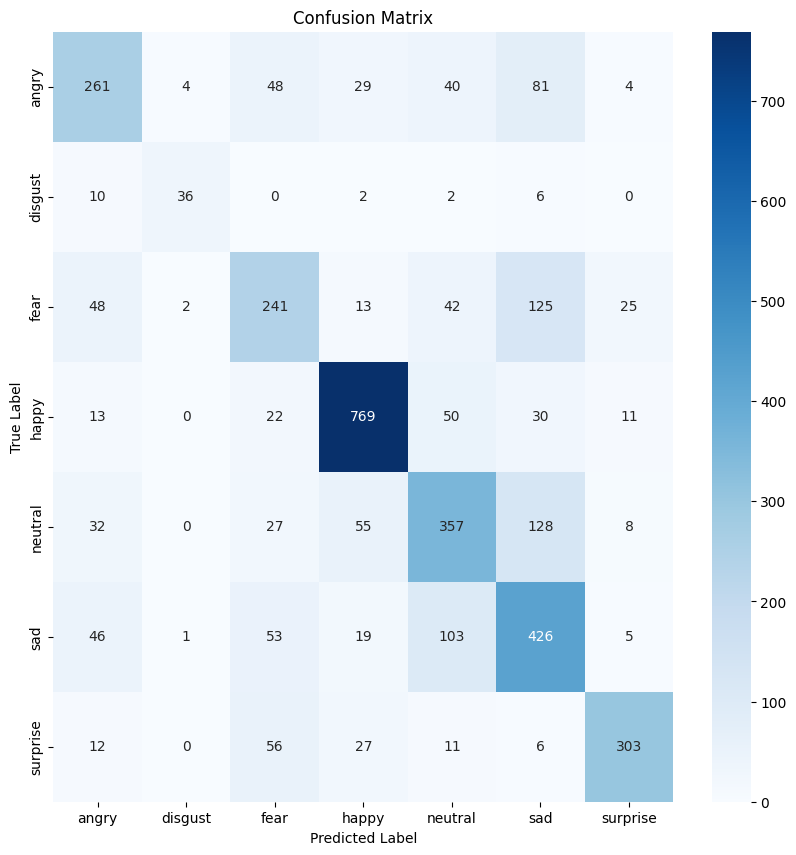

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Reset the test generator
test_generator.reset()

# Get predictions
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels,
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

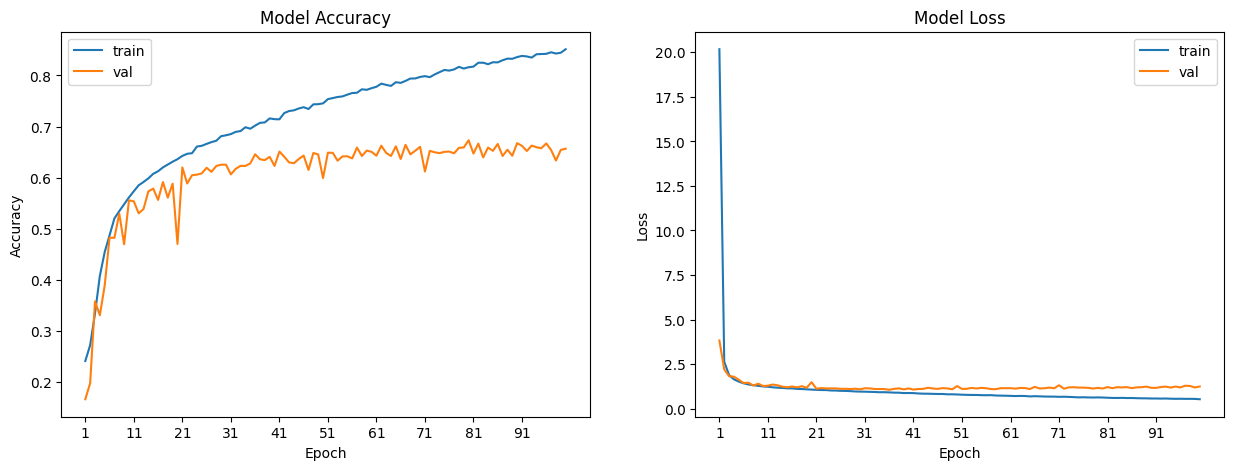

In [ ]:
plot_model_history(history)

### Simple model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

# Define the batch size
batch_size = 64

# Augmentation configuration we use for training with a validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Configuration for validation data (no augmentation, just resizing, recoloring, and rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1  # Match the validation split with train_datagen
)

# Training data generator (specifying 'subset' as 'training')
train_generator = train_datagen.flow_from_directory(
    '/content/fer_data/train',  # Replace with your training data directory
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Validation data generator (using validation_datagen)
validation_generator = validation_datagen.flow_from_directory(
    '/content/fer_data/validation',  # Replace with your training data directory
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

# Test data generator (using validation_datagen)
test_generator = validation_datagen.flow_from_directory(
    '/content/fer_data/test',  # Replace with your actual path to the test data
    target_size=(48, 48),
    batch_size=1,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False  # Important for test data to not shuffle
)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 100
batch_size = 128

history = model.fit(train_generator,epochs = 60,validation_data = validation_generator)

Epoch 1/60
449/449 [==============================] - 13s 25ms/step - loss: 1.7016 - accuracy: 0.3204 - val_loss: 1.5483 - val_accuracy: 0.4026
Epoch 2/60
449/449 [==============================] - 11s 25ms/step - loss: 1.5214 - accuracy: 0.4127 - val_loss: 1.4252 - val_accuracy: 0.4514
Epoch 3/60
449/449 [==============================] - 11s 25ms/step - loss: 1.4360 - accuracy: 0.4492 - val_loss: 1.3651 - val_accuracy: 0.4884
Epoch 4/60
449/449 [==============================] - 11s 25ms/step - loss: 1.3674 - accuracy: 0.4761 - val_loss: 1.3100 - val_accuracy: 0.4948
Epoch 5/60
449/449 [==============================] - 11s 25ms/step - loss: 1.3162 - accuracy: 0.4974 - val_loss: 1.2665 - val_accuracy: 0.5068
Epoch 6/60
449/449 [==============================] - 11s 25ms/step - loss: 1.2708 - accuracy: 0.5132 - val_loss: 1.2391 - val_accuracy: 0.5196
Epoch 7/60
449/449 [==============================] - 11s 25ms/step - loss: 1.2328 - accuracy: 0.5298 - val_loss: 1.2280 - val_accuracy:

In [ ]:
model.save('simple_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


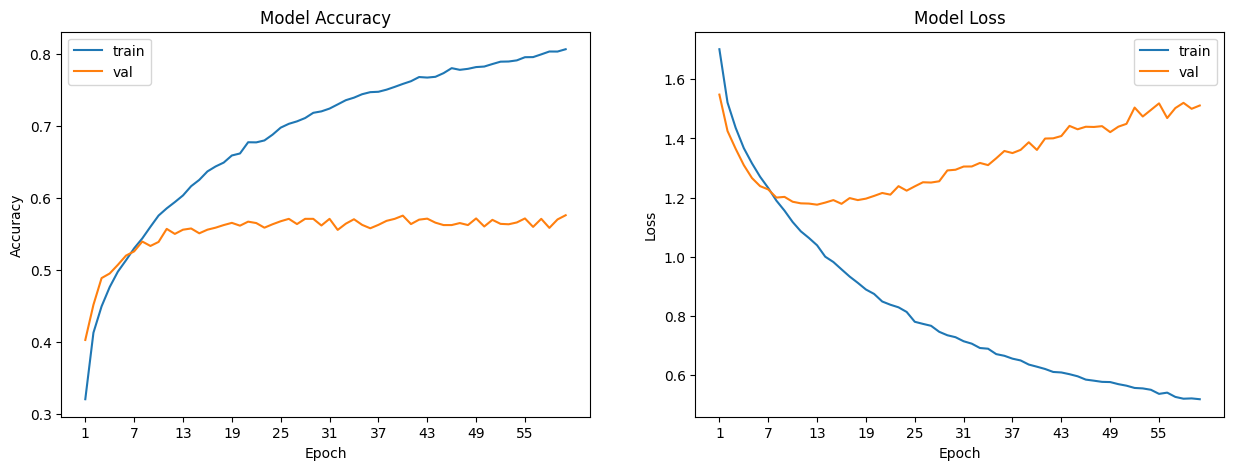

In [ ]:
plot_model_history(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

3589/3589 [==============================] - 9s 2ms/step - loss: 1.5819 - accuracy: 0.5617
Test accuracy: 0.5617163777351379
Test loss: 1.581886887550354


3589/3589 [==============================] - 7s 2ms/step


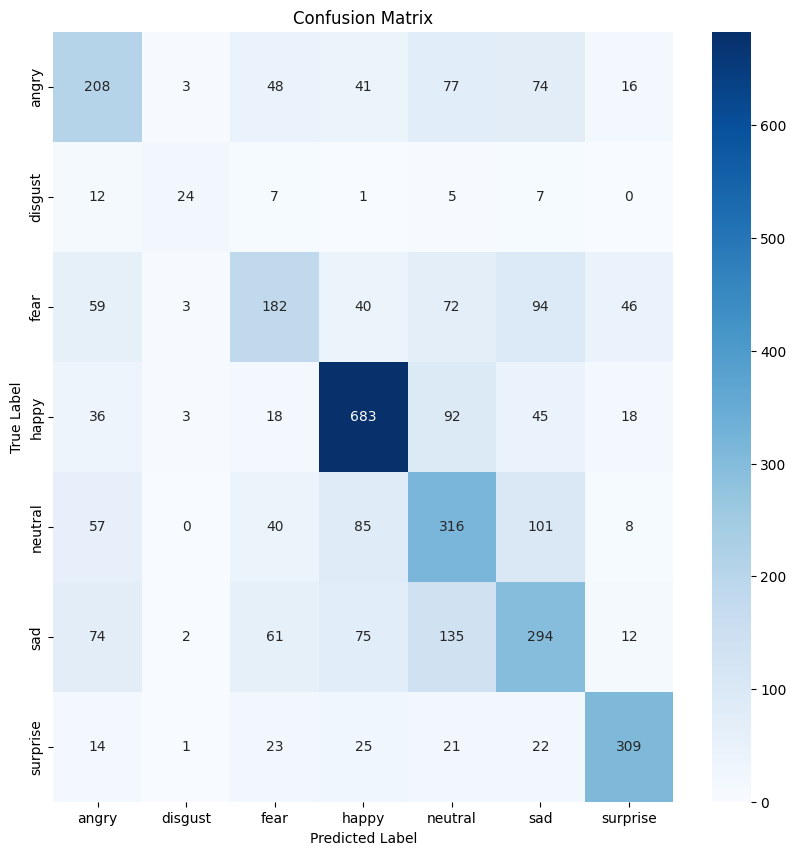

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Reset the test generator
test_generator.reset()

# Get predictions
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels,
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

/content/drive/MyDrive/pretrained_Resnet.h5

In [ ]:
!pip3 install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 33.1 MB/s eta 0:00:00


In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layer_model /content/drive/MyDrive/pretrained_Resnet.h5 /content/tfjs

2024-01-10 04:04:45.899734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 04:04:45.899797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 04:04:45.901304: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 04:04:45.909302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 04:04:46.972684: W tensorflow/compiler/tf2

In [ ]:
!pip3 uninstall jax jaxlib

Found existing installation: jax 0.4.23
Uninstalling jax-0.4.23:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/jax-0.4.23.dist-info/*
    /usr/local/lib/python3.10/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.4.23
Found existing installation: jaxlib 0.4.23+cuda12.cudnn89
Uninstalling jaxlib-0.4.23+cuda12.cudnn89:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/jaxlib-0.4.23+cuda12.cudnn89.dist-info/*
    /usr/local/lib/python3.10/dist-packages/jaxlib/*
Proceed (Y/n)? y
  Successfully uninstalled jaxlib-0.4.23+cuda12.cudnn89


In [ ]:
!pip3 install jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 19.7 MB/s eta 0:00:00
